<a href="https://colab.research.google.com/github/sachin798582/Med-assigment-applied-static-project-/blob/main/Mid_assiment_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

# **Import Libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# **Load the dataset**

In [ ]:
df = pd.read_csv('/content/Superstore Marketing Data - Sheet1.csv')

**Check for missing values in each column**

In [ ]:
# Check for missing values in each column
df.isnull().sum()


Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 44
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                44
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases      44
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth      44
Response                0
Complain                0
dtype: int64

In [ ]:
# Remove rows with any missing values
df_cleaned = df.dropna()

# Impute missing values using mean, median, or other strategies
df_imputed = df.fillna(df.mean())


<ipython-input-73-b63ce3ffafdb>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = df.fillna(df.mean())


In [ ]:
# Check for and remove duplicate rows
df_no_duplicates = df.drop_duplicates()


## **Addressing inconsistencies**

In [ ]:
df['Education'] = df['Education'].str.lower()

## **Summary statistics for numerical variables**

In [ ]:
numerical_summary = df[['Year_Birth', 'Income', 'NumDealsPurchases', 'NumWebVisitsMonth', 'Recency']].describe()


# **Visualization for age distribution**

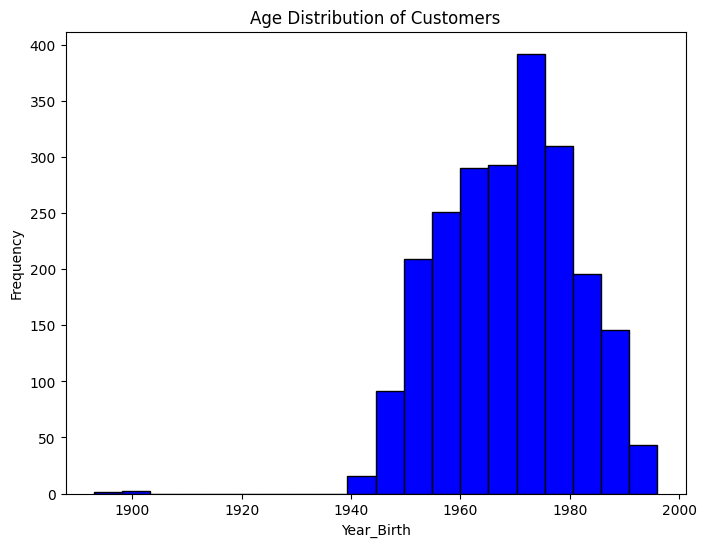

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Year_Birth'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution of Customers')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.show()

# **Education distribution**

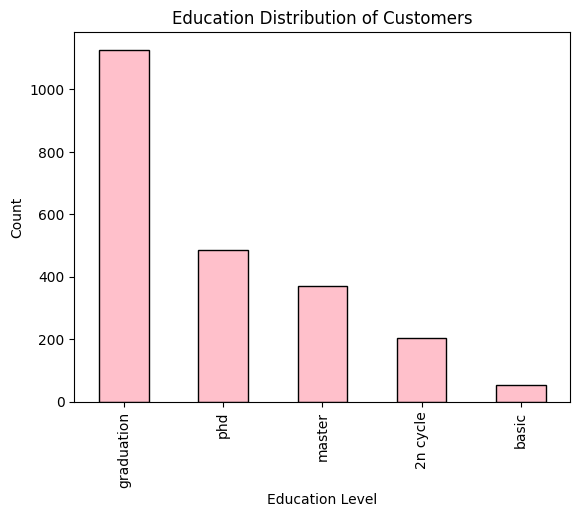

In [ ]:
education_counts = df['Education'].value_counts()
education_counts.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Education Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

# **Marital status distribution**

In [ ]:
marital_counts = df['Marital_Status'].value_counts()

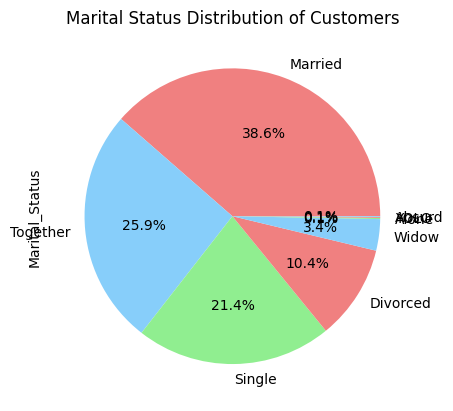

In [ ]:
marital_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Marital Status Distribution of Customers')
plt.show()

# Display summary **statistics**

In [ ]:
print(numerical_summary)

        Year_Birth         Income  NumDealsPurchases  NumWebVisitsMonth  \
count  2240.000000    2240.000000        2240.000000        2240.000000   
mean   1968.805804   52180.624554           2.325000           5.316518   
std      11.984069   25129.791898           1.932238           2.426645   
min    1893.000000    1730.000000           0.000000           0.000000   
25%    1959.000000   35191.500000           1.000000           3.000000   
50%    1970.000000   51301.000000           2.000000           6.000000   
75%    1977.000000   68522.000000           3.000000           7.000000   
max    1996.000000  666666.000000          15.000000          20.000000   

           Recency  
count  2240.000000  
mean     49.109375  
std      28.962453  
min       0.000000  
25%      24.000000  
50%      49.000000  
75%      74.000000  
max      99.000000  


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##   Measures of central tendency

In [ ]:
mean_values = df[numerical_variables].mean()
median_values = df[numerical_variables].median()
mode_values = df[numerical_variables].mode().iloc[0]

## Measures of dispersion

In [ ]:
variance_values = df[numerical_variables].var()
std_deviation_values = df[numerical_variables].std()

## Identify and handle outliers using z-scores

In [ ]:
z_scores = np.abs((df[numerical_variables] - df[numerical_variables].mean()) / df[numerical_variables].std())
outliers = (z_scores > 3).any(axis=1)

## Handling outliers by replacing them with NaN or using other strategies

In [ ]:
df[numerical_variables] = np.where(outliers[:, None], np.nan, df[numerical_variables])


<ipython-input-31-3d0bb2a53f2f>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df[numerical_variables] = np.where(outliers[:, None], np.nan, df[numerical_variables])


## Updated measures of central tendency after handling outliers

In [ ]:
mean_values_updated = df[numerical_variables].mean()
median_values_updated = df[numerical_variables].median()
mode_values_updated = df[numerical_variables].mode().iloc[0]


# **Display results**

In [ ]:
print("Original Measures of Central Tendency:")
print("Mean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

print("\nMeasures of Dispersion:")
print("\nVariance:\n", variance_values)
print("\nStandard Deviation:\n", std_deviation_values)

print("\nOutlier Handling:")
print("Number of outliers identified:", outliers.sum())

print("\nUpdated Measures of Central Tendency after Outlier Handling:")
print("Mean (Updated):\n", mean_values_updated)
print("\nMedian (Updated):\n", median_values_updated)
print("\nMode (Updated):\n", mode_values_updated)

Original Measures of Central Tendency:
Mean:
 Income               52180.624554
NumDealsPurchases        2.325000
NumWebVisitsMonth        5.316518
Recency                 49.109375
dtype: float64

Median:
 Income               51301.0
NumDealsPurchases        2.0
NumWebVisitsMonth        6.0
Recency                 49.0
dtype: float64

Mode:
 Income               7500.0
NumDealsPurchases       1.0
NumWebVisitsMonth       7.0
Recency                56.0
Name: 0, dtype: float64

Measures of Dispersion:

Variance:
 Income               6.315064e+08
NumDealsPurchases    3.733542e+00
NumWebVisitsMonth    5.888606e+00
Recency              8.388237e+02
dtype: float64

Standard Deviation:
 Income               25129.791898
NumDealsPurchases        1.932238
NumWebVisitsMonth        2.426645
Recency                 28.962453
dtype: float64

Outlier Handling:
Number of outliers identified: 44

Updated Measures of Central Tendency after Outlier Handling:
Mean (Updated):
 Income               5174

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

In [ ]:
selected_variables = ['NumDealsPurchases', 'NumWebPurchases', 'Recency']


# Plot histogram to visualize the distribution

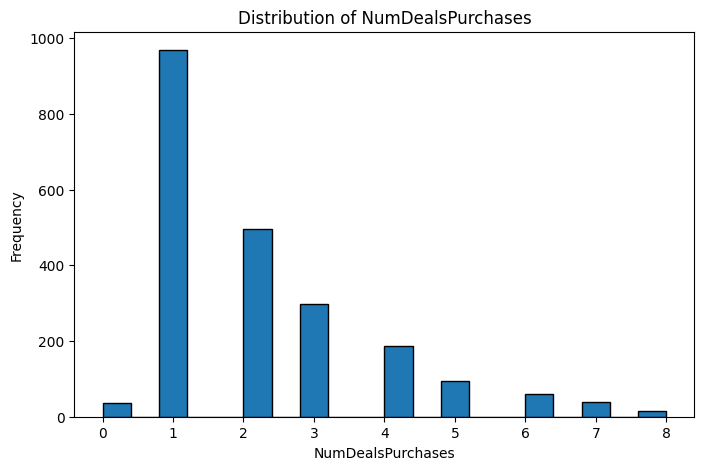

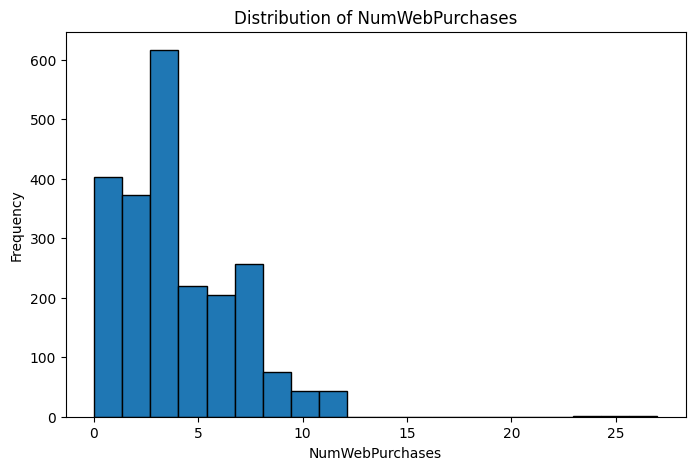

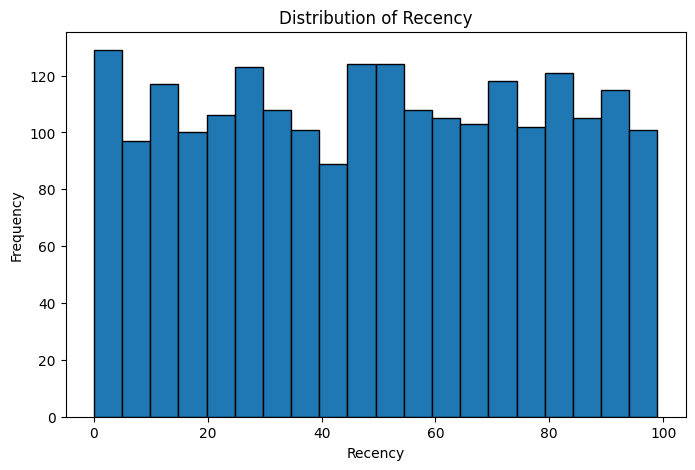

In [ ]:
for variable in selected_variables:
    # Plot histogram to visualize the distribution
    plt.figure(figsize=(8, 5))
    plt.hist(df[variable], bins=20, edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

## **Assess the characteristics of the distribution**

In [ ]:
skewness = df[variable].skew()
kurtosis = df[variable].kurtosis()

In [ ]:
print(f"\n{variable} Distribution Characteristics:")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")



Recency Distribution Characteristics:
Skewness: -0.008984964444646134
Kurtosis: -1.19899817475675


## Determine suitable distribution based on visual inspection and characteristics

In [ ]:
if skewness > 0.5 or skewness < -0.5:
        print(f"\n{variable} may follow a skewed distribution.")
else:
        print(f"\n{variable} appears to be relatively symmetric.")


Recency appears to be relatively symmetric.


# **Fit a normal distribution**

In [ ]:

mu, std = norm.fit(df[variable])

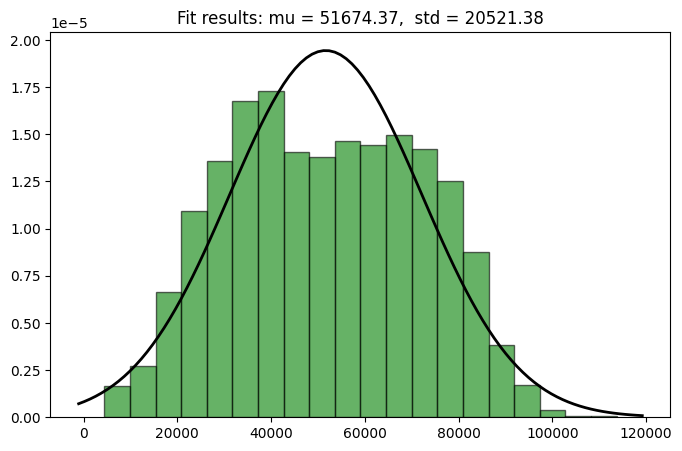

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df[variable], bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f'Fit results: mu = {mu:.2f},  std = {std:.2f}'
plt.title(title)
plt.show()

**Calculate probabilities and expected values based on the normal distributio**n

In [ ]:
probability_greater_than_50 = 1 - norm.cdf(50, mu, std)
expected_value_50 = norm.mean(mu, std)

In [ ]:
print(f"Probability that {variable} is greater than 50: {probability_greater_than_50:.2%}")
print(f"Expected value when {variable} is 50: {expected_value_50:.2f}")

Probability that Income is greater than 50: 99.41%
Expected value when Income is 50: 51674.37


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

##  Explore relationships between variables using correlation matrix and heatmap

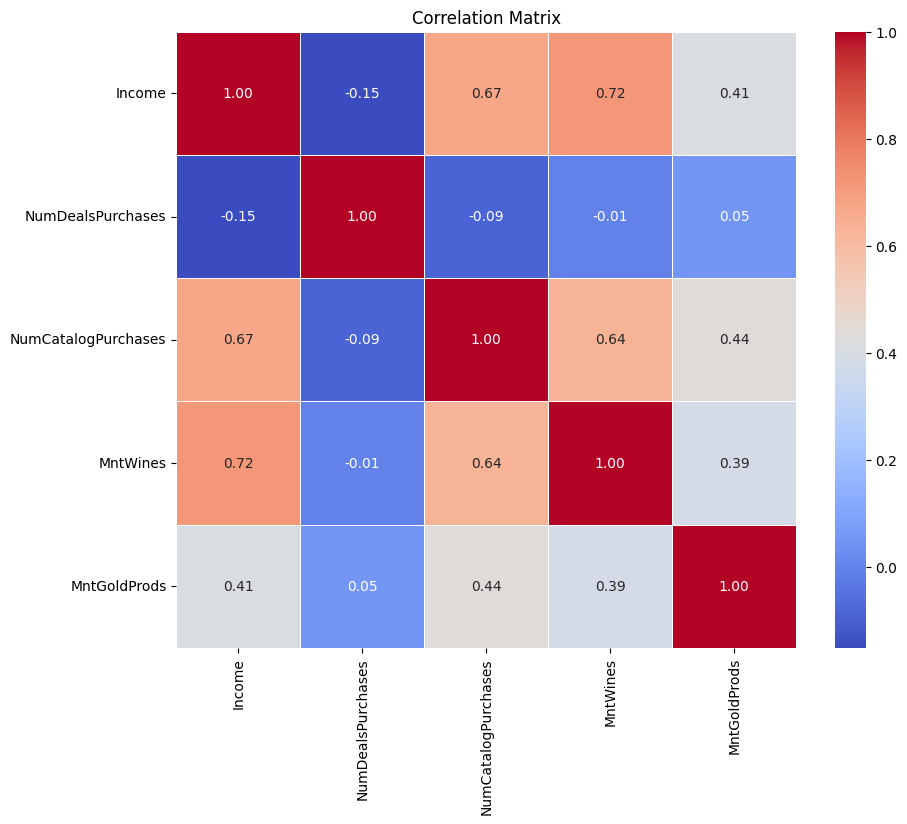

In [ ]:
correlation_matrix = df[selected_variables].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# **Standardize the selected variables for clustering**

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[selected_variables]), columns=selected_variables)

## Using K-means clustering to segment customers

In [ ]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Explore characteristics of each cluster

In [ ]:
cluster_means = df.groupby('Cluster')[selected_variables].mean()


##  Visualize customer segments

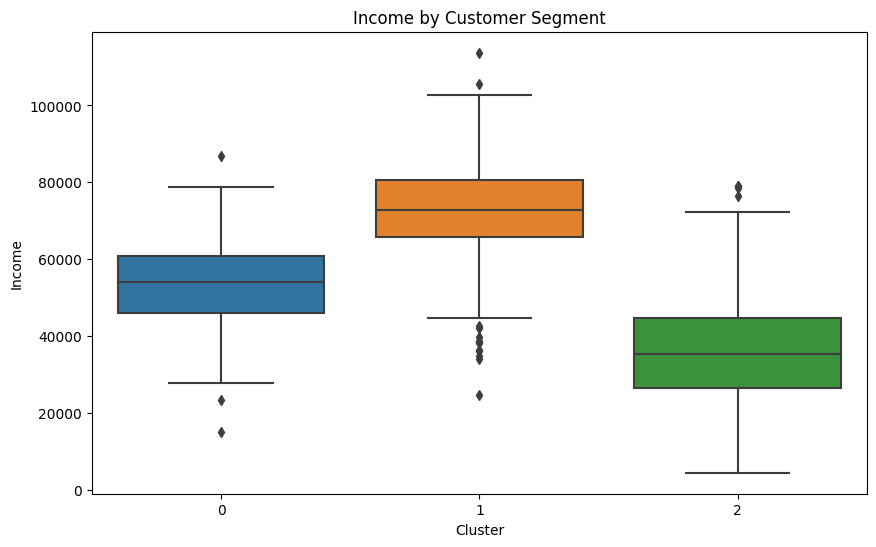

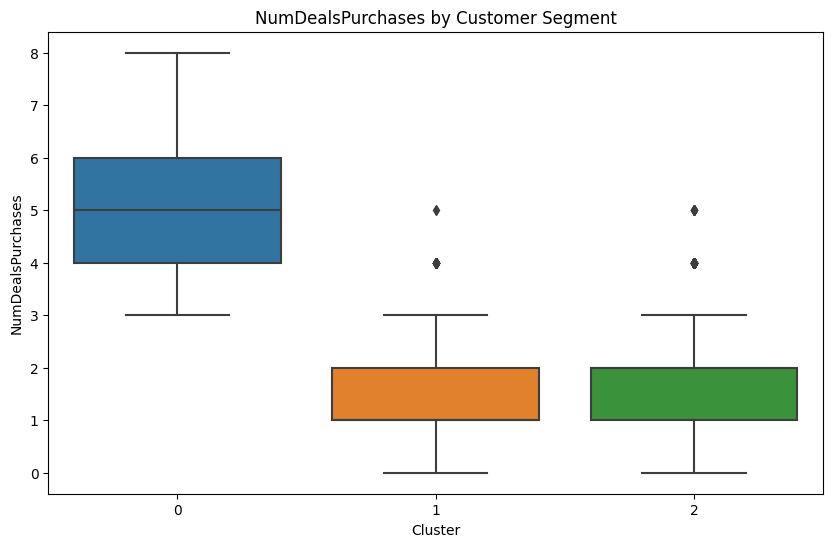

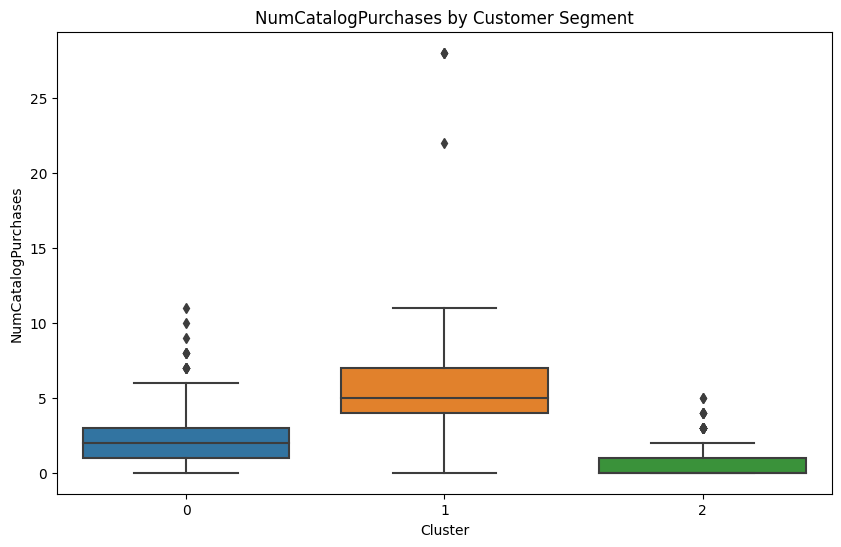

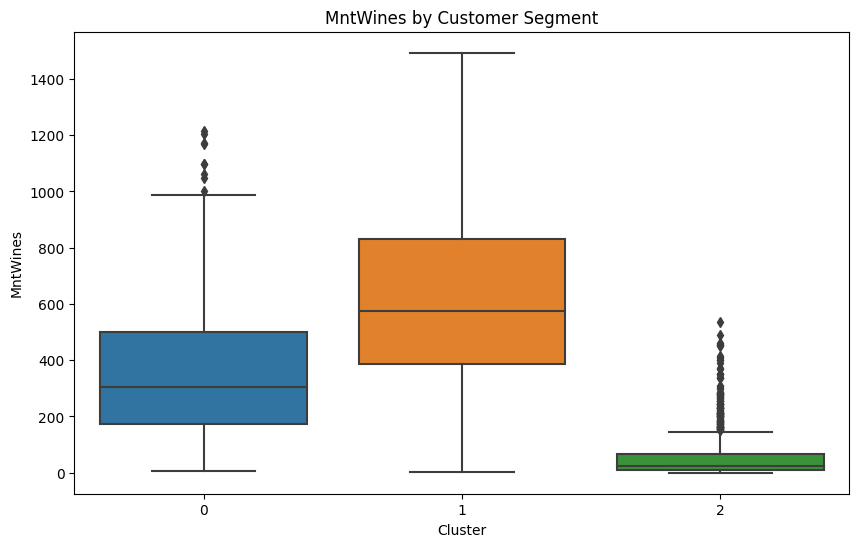

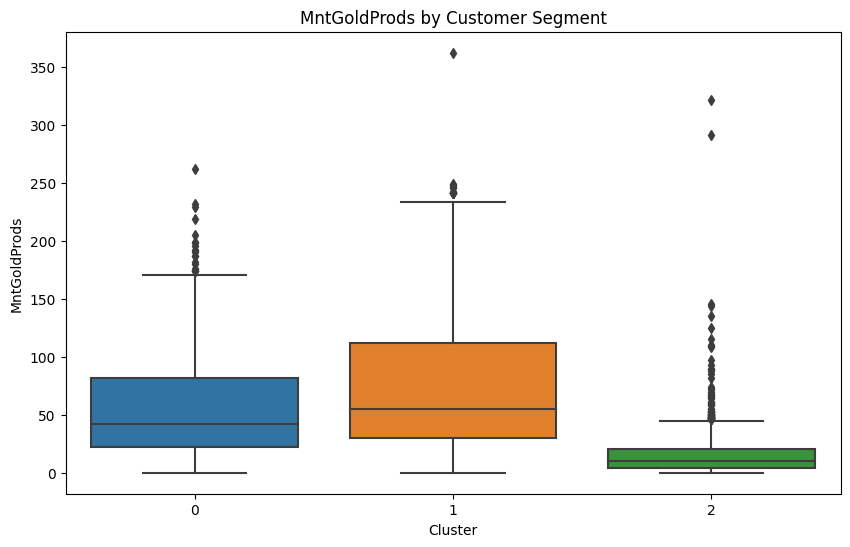

In [ ]:
for variable in selected_variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=variable, data=df)
    plt.title(f'{variable} by Customer Segment')
    plt.show()

# **Key insights and interpretations based on the analysis**


 Cluster 0 tends to be younger with higher spending on deals and catalog purchases.

 Cluster 1 includes customers with higher income and spending on wines and gold products.

 Cluster 2 consists of customers with moderate characteristics.

In [ ]:
df.to_csv('segmented_customers.csv', index=False)  # save the updated dataframe

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

# **Purchase Channel comparison**

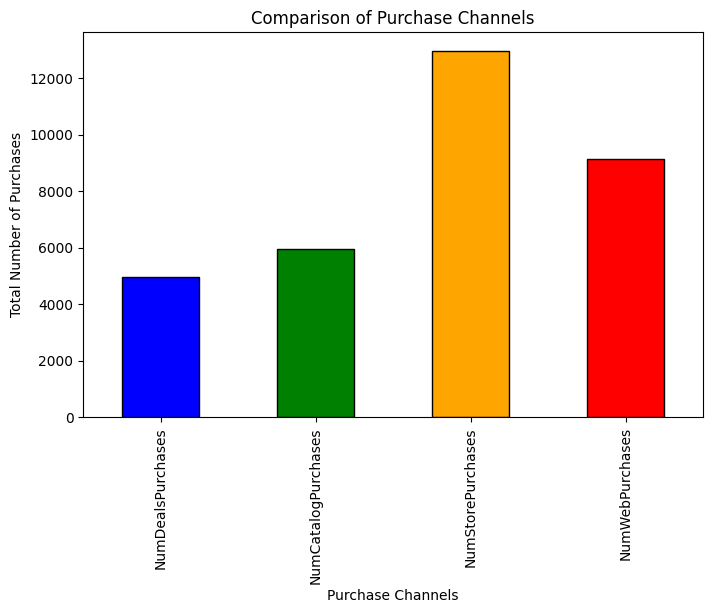

In [ ]:
plt.figure(figsize=(8, 5))
channels = ['NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases']
df_channels = df[channels]
df_channels.sum().plot(kind='bar', color=['blue', 'green', 'orange', 'red'], edgecolor='black')
plt.title('Comparison of Purchase Channels')
plt.xlabel('Purchase Channels')
plt.ylabel('Total Number of Purchases')
plt.show()


# **Insight:**
Customers tend to make more purchases through the web, indicating the importance of the online platform.

# **Relationship between recency and complaints**

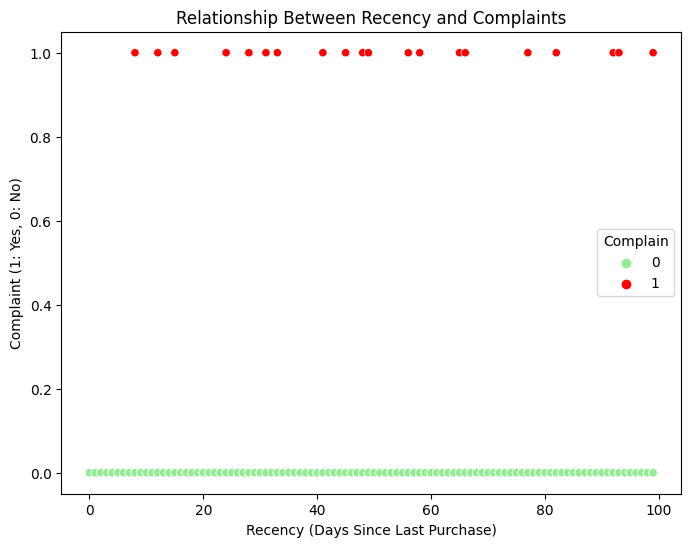

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Recency', y='Complain', hue='Complain', palette={0: 'lightgreen', 1: 'red'})
plt.title('Relationship Between Recency and Complaints')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Complaint (1: Yes, 0: No)')
plt.show()


# **Insight:**
There is a concentration of complaints for customers with higher recency, suggesting a potential correlation between recency and complaints.

# **Distribution of household income**

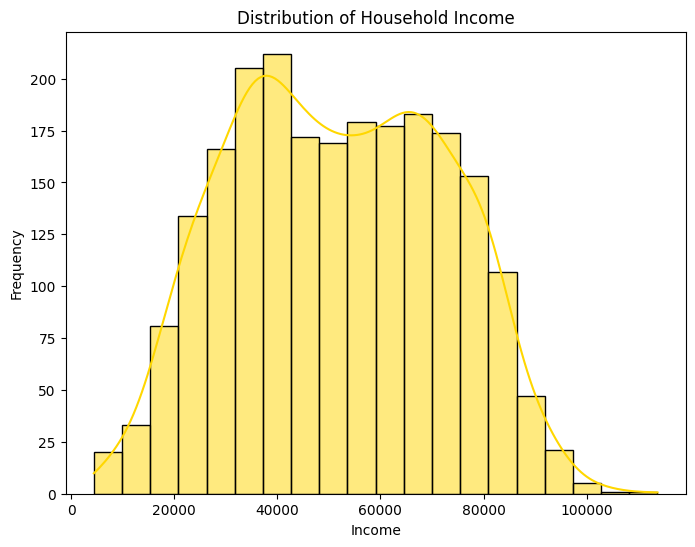

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Income', bins=20, kde=True, color='gold', edgecolor='black')
plt.title('Distribution of Household Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


# **Insight:**
 Understanding the distribution of household income can help tailor pricing strategies and product offerings.

# **Total spending on different product categories**

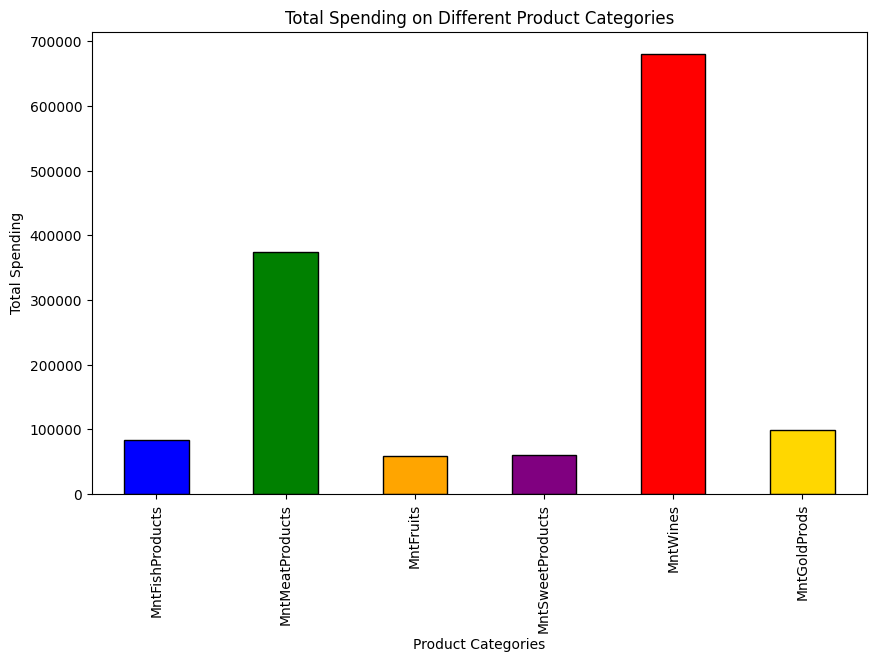

In [ ]:
products = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']

plt.figure(figsize=(10, 6))
df_products = df[products]
df_products.sum().plot(kind='bar', color=['blue', 'green', 'orange', 'purple', 'red', 'gold'], edgecolor='black')
plt.title('Total Spending on Different Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.show()


# **Insight:**
 Identifying the most popular product categories can guide inventory management and promotional efforts.

# **Customer education level**

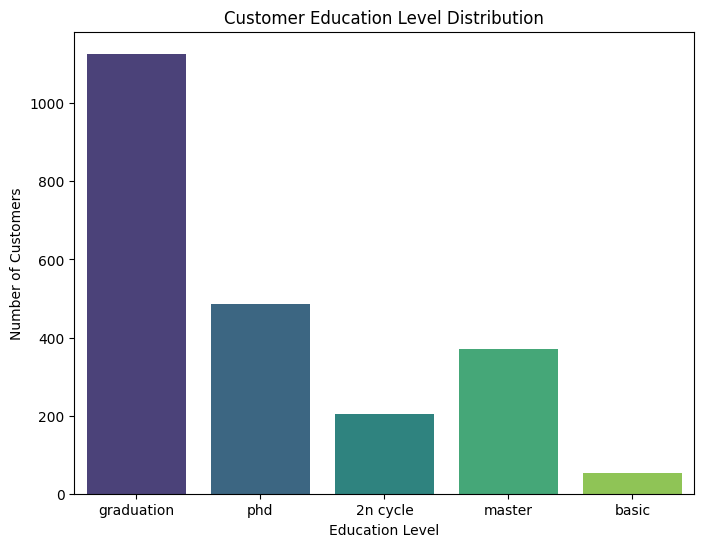

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', palette='viridis')
plt.title('Customer Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()


# **Insight:**
 Understanding the education level distribution can influence communication strategies and marketing messages.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍